In [47]:
!pip install -r requirements.txt

In [48]:
import torch

# Model (yolov5s, yolov5x6)
model = torch.hub.load('ultralytics/yolov5', 'yolov5x6')


Using cache found in /Users/diego/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2022-10-23 Python-3.10.7 torch-1.12.1 CPU

Fusing layers... 
YOLOv5x6 summary: 574 layers, 140730220 parameters, 0 gradients
Adding AutoShape... 


image 1/1: 576x768 1 bicycle, 1 truck, 1 dog, 1 potted plant
Speed: 20.3ms pre-process, 651.0ms inference, 0.9ms NMS per image at shape (1, 3, 512, 640)


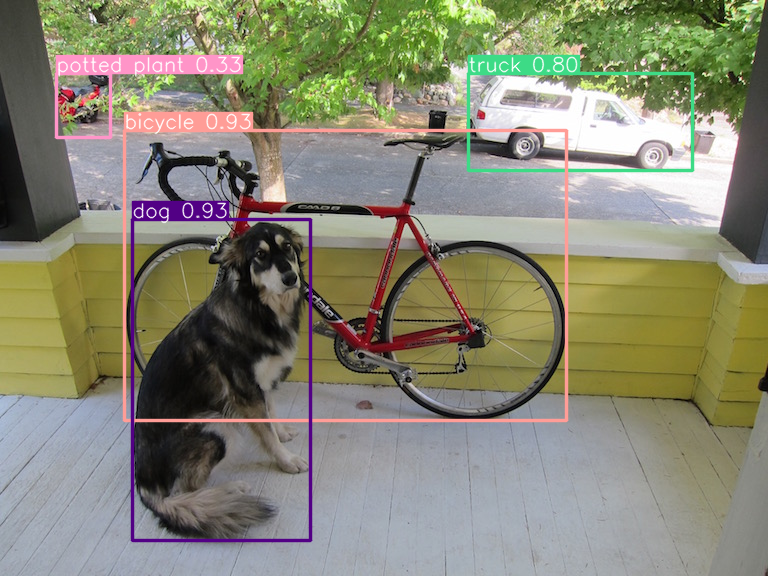

In [49]:

# Images
img = './dependencias/dog.jpg'  # or file, Path, PIL, OpenCV, numpy, list

# Inference
results = model(img)

# Results
results.print()
results.show()

In [50]:
import pandas as pd

df = pd.DataFrame(results.pandas().xyxy[0])
df.head()

,xmin,ymin,xmax,ymax,confidence,class,name
0,132.370224,219.731415,310.367523,540.853699,0.932789,16,dog
1,124.202911,130.397522,566.568787,420.110382,0.932456,1,bicycle
2,468.035889,73.715263,692.643860,170.407333,0.797602,7,truck
3,56.469944,73.091820,110.464218,137.009598,0.332759,58,potted plant


In [51]:
result = {}

def count_names(name):
    i = 0
    try:
        i = result[name]
    except:
        pass
    i += 1
    result[name] = i

df['name'].map(count_names)

0    None
1    None
2    None
3    None
Name: name, dtype: object

In [52]:
from gtts import gTTS

lang = 'en'
text = ''

def get_plural(word, count):
    if count > 1:
        return word + 's'
    else:
        return word


if len(result) == 0:
    text = 'I wasn\'t able to identify anything in front of you.'
else:
    text = 'There are '
    i = 0
    for name in result:
        i += 1
        count = result[name]
        text += str(count) + ' ' + get_plural(name, count)
        if i == len(result) - 1:
            text += ' and '
        elif i == len(result):
            text += ' '
        else:
            text += ', '
    text += 'in front of you'

gtts_obj = gTTS(text=text, lang=lang)
gtts_obj.save('audio.wav')

print(text)
from playsound import playsound
playsound('audio.wav')

There are 1 dog, 1 bicycle, 1 truck and 1 potted plant in front of you
